#                                 PANDA SALES ANALYSIS

## Objective  

Upon initial ispection of the data, we can start thinking of some questions about it that we would want to answer.
- What is overall sales trend?
- What are top 10 products by sale?
- What are most selling products?
- Which is the most preferred shipping mode?
- Which are profitable categories and sub categories?

<h4> IMPORTING REQUIRED LIBRARIES

In [26]:
# For Data Manipulation
import pandas as pd

# For Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<h4> IMPORTING DATASET

In [27]:
# Importing Excel data in a data frame
df = pd.read_excel('superstore_sales.xlsx')

<h4> DATA AUDITING

We cannot work with the data until we know what are we dealing with, for example,
- Sales, Product name column
- Looking for any missing data
- Number of rows and so on.

In [28]:
# First 5 rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [29]:
# Last 5 rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [30]:
# Still we need more information regarding the number of rows and columns
df.shape

(51290, 21)

In [31]:
# All the columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [32]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [33]:
# Checking for any missing values in all the columns
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [34]:
# Gestting descritive analysis of our data
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


## EXPLORATORY DATA ANALYSIS

- <H4> WHAT IS OVERALL SALES TREND?

In [35]:
# Min date in the data
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [36]:
# Max date in the data
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

<h4> Approach

1. Generate a new column with Year and Date in format (YYYY-MM)
2. Group all the Sales of the same Month and combine it with the above New Column
3. Plot the new dataframe with X axis as Month-Year and Y axis as COmbined Month Sales

In [37]:
# Generate a new column of Month year 
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m')) # changing format of the date

In [38]:
# New Data frame with Month Year and combined sales 
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

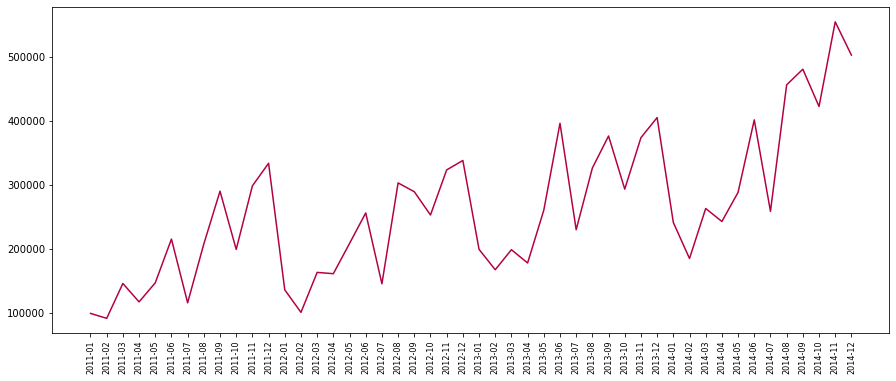

In [39]:
#setting figure sizeand colour
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'],df_trend['sales'], color = '#b40045')
plt.xticks(rotation = 'vertical', size = 8)
plt.show()

### Inferences

1. First four months of each particular year, sales are not that much high, and generally there is a dip in starting of every year.
2. In all the four year sales, there is a specific drop in sales in July as well as in october.
3. Overall the Sales of company is increaing thus we can infer that company is growing.

- <h4>`WHICH ARE TOP 10 PRODUCTS BY SALE?

<h4> Approach

1. We need two columns, product name and the sales. 
2. We will get the combined sale for that project using groupby
3. Arrange it in decending order and print out top 10 objects.

In [40]:
# create a new data frame
product_sales =  pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [41]:
# Sorting the sales in descending order
product_sales = product_sales.sort_values('sales', ascending = False)

In [42]:
# Displaying only top 10 rows
product_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### Inferences

1. These are the top 10 products with their corresponding sales, which we can furthur use to implement our marketing strategies

- <h4> WHICH ARE MOST SELLING PRODUCTS?

<h4> Approach

1. We need a table which contain Product name and the combined quantity sold.
2. Group that into a dataframe.
3. Arrange them in descending order and print only first 5.

In [43]:
# Generating required Data table

product_most_sold = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

In [44]:
# Sorting the data of quantity column in descending order

product_most_sold = product_most_sold.sort_values('quantity', ascending = False)

In [45]:
# Displaying Top 5 most selling products

product_most_sold[:5]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259


- <h4> WHICH IS MOST PREFERRED SHIPPING MODE?

<h4> Approach

Apply count plot on the Shipping Mode Column

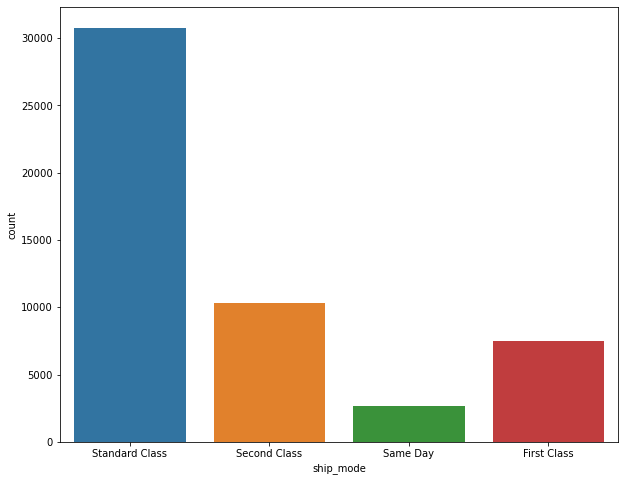

In [51]:
# Set a readable figure size
plt.figure(figsize = (10,8))

# Using seaborn count the number of ship modes
sns.countplot(x = df['ship_mode'])

plt.show()

### Inferences

1. Standard Class is preferred by almost 31 thousand people out of 51 thousand.
2. Same day ship mode is least preferred.

- <h4> WHICH ARE PROFITABLE CATEGORIES AND SUB-CATEGORIES?

<h4> Approach

1. Filter out a new data set with categories, its sub Categories and the respective Profits
2. Sort the data in descending order.

In [55]:
# Grouping Category and Sub Category

cat_subcat = pd.DataFrame(df.groupby(['category','sub_category']).sum()['profit'])

In [58]:
# Sorting the Values of Pofit categorically

cat_subcat = cat_subcat.sort_values(['category','profit'], ascending = False)

In [60]:
# Displaying the Results

cat_subcat

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870

## END